# SyriaTel  Customer Churn

Churn is when customers stop using a service, which can have a significant impact on a telecom company's revenue: 
Why is churn a problem?
Churn is a problem for telecom companies because revenue depends on recurring subscriptions. Churn can lead to lost income and higher expenses. 
What causes churn?
Churn can be caused by several factors such as 
Concerns about service quality 
More attractive offers from competitors 
A perceived lack of value 
How to reduce churn?
Companies can use machine learning models to identify customers who are likely to leave and the reasons why. 
This data can help companies improve their services and reduce churn. 


## Importing  required libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report, precision_recall_curve
from numbers import Number
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Load the CSV Data

In [58]:

df =pd.read_csv('SyriaTel Customer Churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Descriptive Analysis

In [59]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [61]:
df.shape

(3333, 21)

In [62]:
df.describe().round(2)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [63]:
df.duplicated().sum()

0

## EDA

In [64]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [65]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [66]:
df.drop(columns=['phone number'], inplace=True)
df.nunique()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [67]:
print(df.columns)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


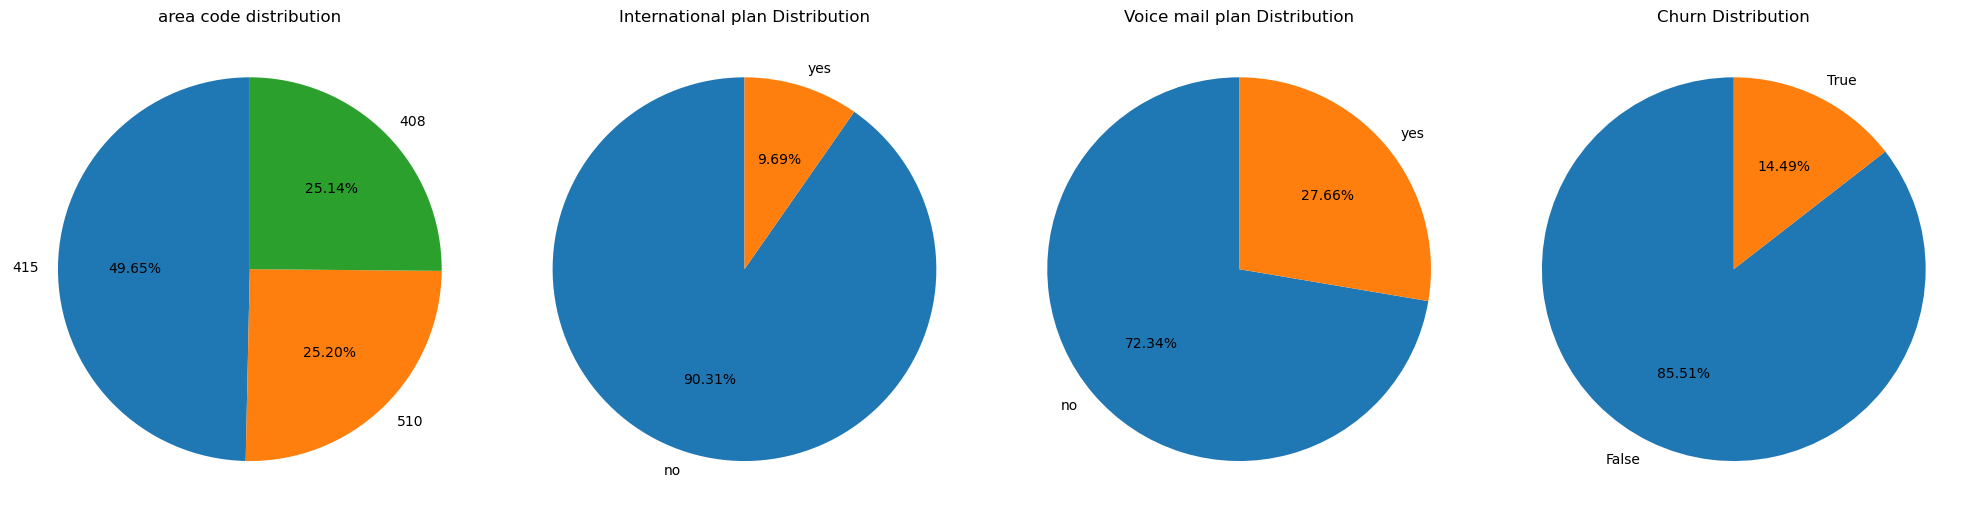

In [68]:
area_code=df['area code'].value_counts().reset_index()
international_plan=df['international plan'].value_counts().reset_index()
voicemail_plan=df['voice mail plan'].value_counts().reset_index()
churn=df['churn'].value_counts().reset_index()


fig,ax=plt.subplots(1,4,figsize=(20,8))
ax[0].pie(x=area_code['count'],labels=area_code['area code'],autopct='%.2f%%',startangle=90)
ax[0].set_title('area code distribution')
ax[1].pie(x=international_plan['count'], labels=international_plan['international plan'],autopct= '%.2f%%',startangle=90) 
ax[1].set_title ('International plan Distribution')
ax[2].pie(x=voicemail_plan['count'],labels=voicemail_plan['voice mail plan'],autopct= '%.2f%%',startangle=90)
ax[2].set_title('Voice mail plan Distribution')
ax[3].pie(x=churn['count'],labels=churn['churn'],autopct= '%.2f%%',startangle=90)
ax[3].set_title('Churn Distribution')
plt.tight_layout()
plt.show()

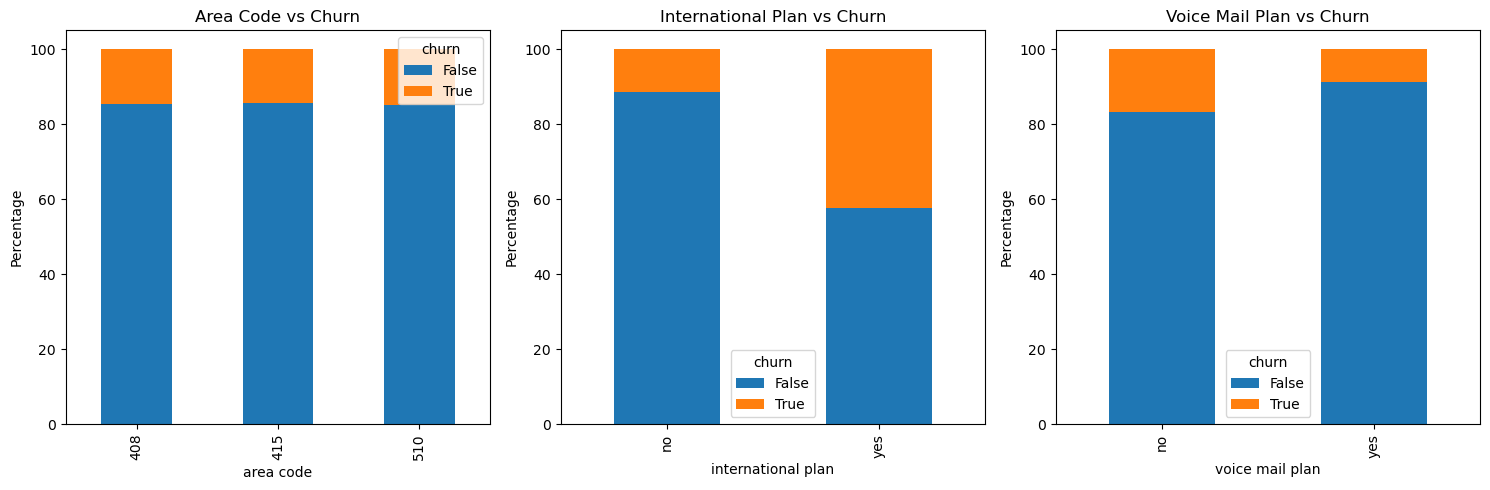

In [69]:
# Create subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first graph (area code vs churn) as percentages
area_code_churn = df.groupby(["area code", "churn"]).size().unstack()
area_code_churn_percentage = area_code_churn.div(area_code_churn.sum(axis=1), axis=0) * 100
area_code_churn_percentage.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Area Code vs Churn')
ax[0].set_ylabel('Percentage')

# Plot the second graph (international plan vs churn) as percentages
intl_plan_churn = df.groupby(["international plan", "churn"]).size().unstack()
intl_plan_churn_percentage = intl_plan_churn.div(intl_plan_churn.sum(axis=1), axis=0) * 100
intl_plan_churn_percentage.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('International Plan vs Churn')
ax[1].set_ylabel('Percentage')

# Plot the third graph (voice mail plan vs churn) as percentages
vm_plan_churn = df.groupby(["voice mail plan", "churn"]).size().unstack()
vm_plan_churn_percentage = vm_plan_churn.div(vm_plan_churn.sum(axis=1), axis=0) * 100
vm_plan_churn_percentage.plot(kind='bar', stacked=True, ax=ax[2])
ax[2].set_title('Voice Mail Plan vs Churn')
ax[2].set_ylabel('Percentage')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



In [70]:
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Define the features (columns) you want to plot
features = [
    'state','account length', 'area code', 'international plan', 
    'voice mail plan', 'number vmail messages', 'total day minutes', 
    'total day calls', 'total day charge', 'total eve minutes', 
    'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 
    'total intl calls', 'total intl charge', 'customer service calls'
]

# Define the plotting function
def plot_feature_distribution(feature):
    # Plotting churn distribution based on the feature
    fig = px.histogram(df, x=feature, color='churn', barmode='stack', 
                       category_orders={"churn": [False, True]},
                       title=f'Distribution of {feature} for Churned and Not Churned Customers',
                       labels={feature: feature})
    fig.show()

# Create the interactive slider widget
feature_slider = widgets.Dropdown(
    options=features,
    description='Feature:',
    value=features[0]
)

# Link the slider to the plotting function
interact(plot_feature_distribution, feature=feature_slider)

interactive(children=(Dropdown(description='Feature:', options=('state', 'account length', 'area code', 'inter…

<function __main__.plot_feature_distribution(feature)>

## MODELLING

## Preprocessing

In [71]:
# Convert categorical variables into numerical format (e.g., "yes"/"no" -> 1/0)
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# For the 'state' column, apply one-hot encoding (since it's categorical with more than two categories)
df = pd.get_dummies(df, columns=['state'], drop_first=True)

# Convert the target column 'churn' into binary format (False = 0, True = 1)
df['churn'] = df['churn'].map({False: 0, True: 1})


## Separating  the features (X) and target (Y

In [72]:
X = df.drop(columns=['churn'])  # Features
Y = df['churn']  # Target variable




## Train-Test Split

In [73]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Feature Scaling

In [74]:
#  Feature Scaling (Apply scaling to the training data and then test data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train and transform train
X_test_scaled = scaler.transform(X_test)  # Transform the test data based on the training scaler

## fitting logistics regression model

In [75]:
#  Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

#  Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] 


## Model Performance and evaluation metrics

Accuracy of the model is : 0.8576

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Confusion Matrix:
[[551  15]
 [ 80  21]]


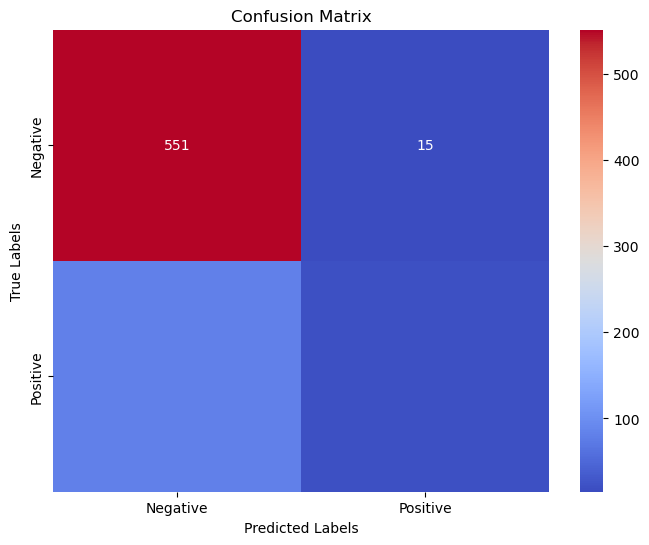


ROC-AUC Score: 0.8164


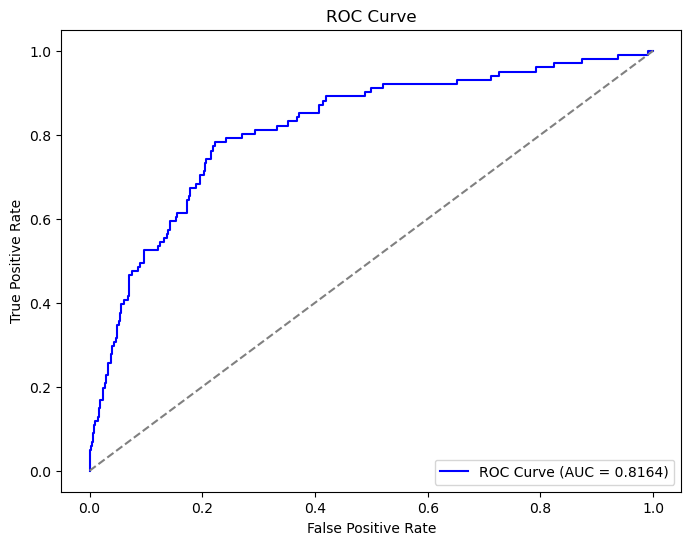

In [76]:
#  Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is : {accuracy:.4f}')

# Additional Evaluation Metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#  ROC-AUC Curve and Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Handling  Class Imbalance using SMOTE

In [77]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print(f'Class distribution before SMOTE: {y_train.value_counts()}')
print(f'Class distribution after SMOTE: {y_train_smote.value_counts()}')



Class distribution before SMOTE: churn
0    2284
1     382
Name: count, dtype: int64
Class distribution after SMOTE: churn
0    2284
1    2284
Name: count, dtype: int64


##  Recalculating the model performance and model evaluation metrics

Accuracy: 0.7826

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       566
           1       0.38      0.72      0.50       101

    accuracy                           0.78       667
   macro avg       0.66      0.76      0.68       667
weighted avg       0.86      0.78      0.81       667

Confusion Matrix:
[[449 117]
 [ 28  73]]


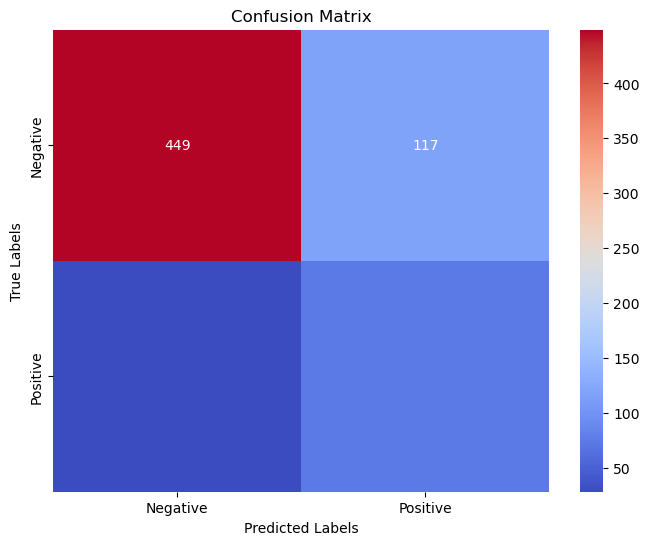


ROC-AUC Score: 0.8228


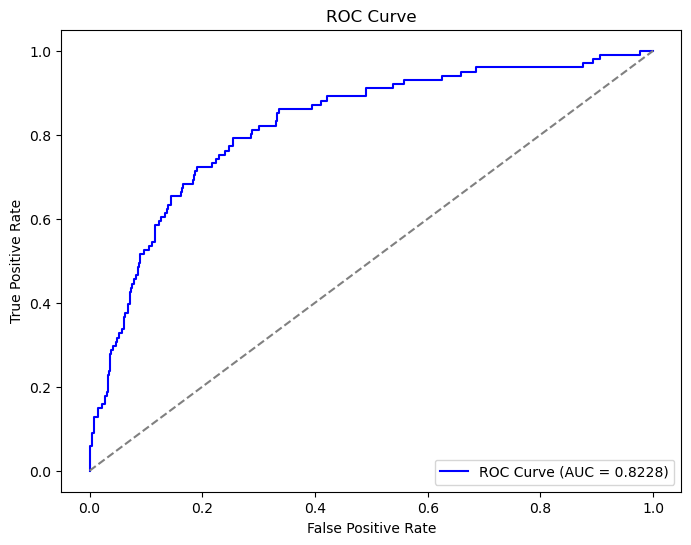

In [ ]:
#  Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)

# Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

#  Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Additional Evaluation Metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#  ROC-AUC Curve and Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Top 6 most important Features in Logistic Regression Model

Top 6 Most Important Features:
                   Feature  Coefficient
17  customer service calls     0.969429
3          voice mail plan    -0.896812
2       international plan     0.881715
7         total day charge     0.417872
4    number vmail messages     0.415864
5        total day minutes     0.402044


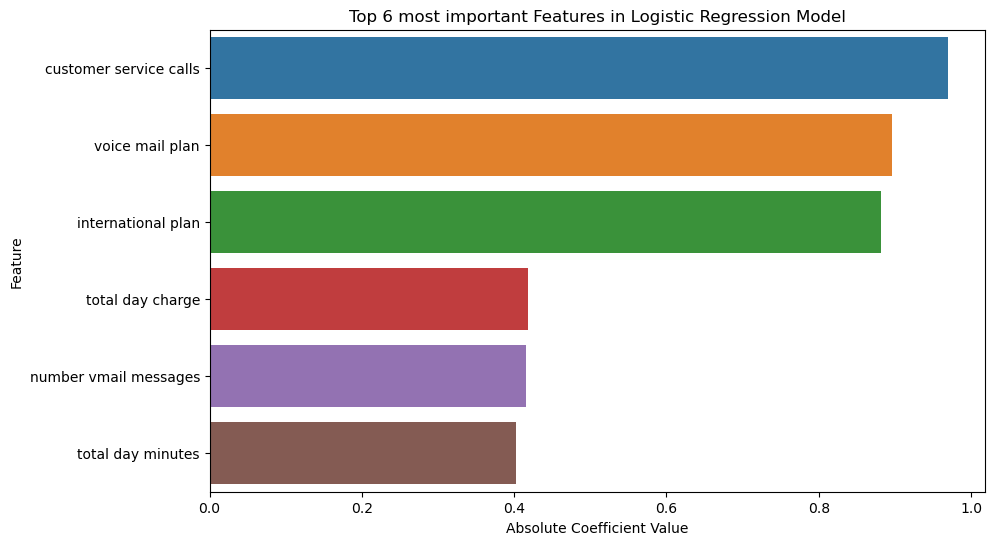

In [ ]:
# Get the coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame to store features and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 6 most important features
print("Top 6 Most Important Features:")
print(feature_importance[['Feature', 'Coefficient']].head(6))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(6))
plt.title('Top 6 most important Features in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

## Fitting and training Random Forest Classifier model

In [80]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train_scaled, y_train)

#  Make Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC


Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       566
           1       1.00      0.60      0.75       101

    accuracy                           0.94       667
   macro avg       0.97      0.80      0.86       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix:
[[566   0]
 [ 40  61]]


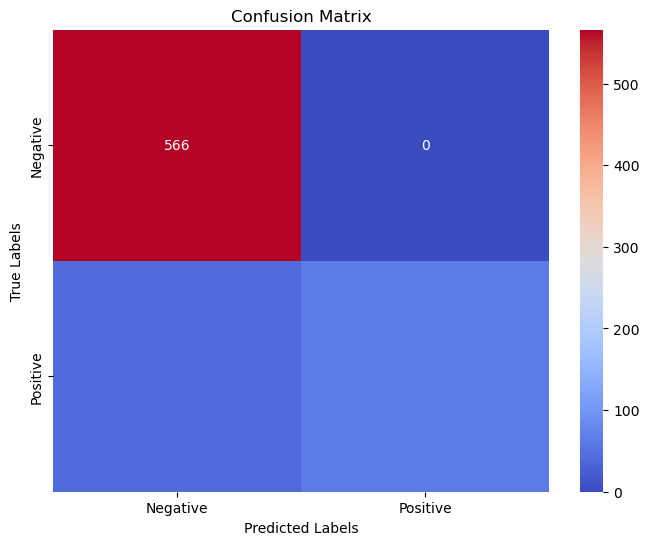


ROC-AUC Score: 0.9225


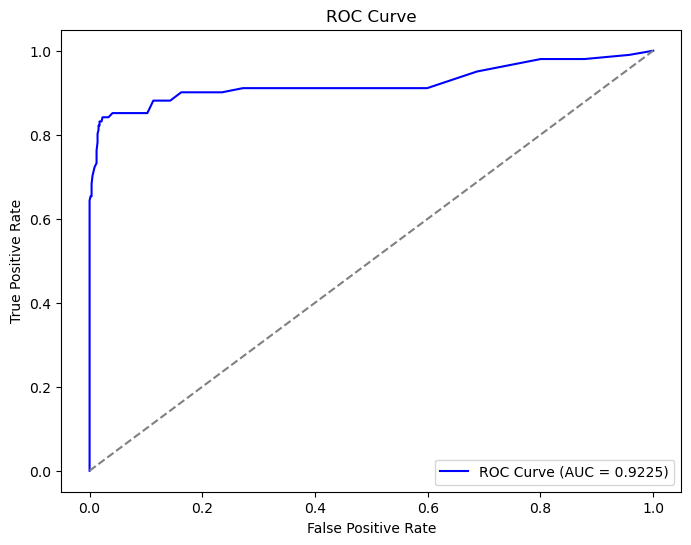

In [ ]:
#  Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Additional Evaluation Metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#  ROC-AUC Curve and Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



## Handling  Class Imbalance using SMOTE & Retraining

Accuracy: 0.9310

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.78      0.75      0.77       101

    accuracy                           0.93       667
   macro avg       0.87      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
[[545  21]
 [ 25  76]]


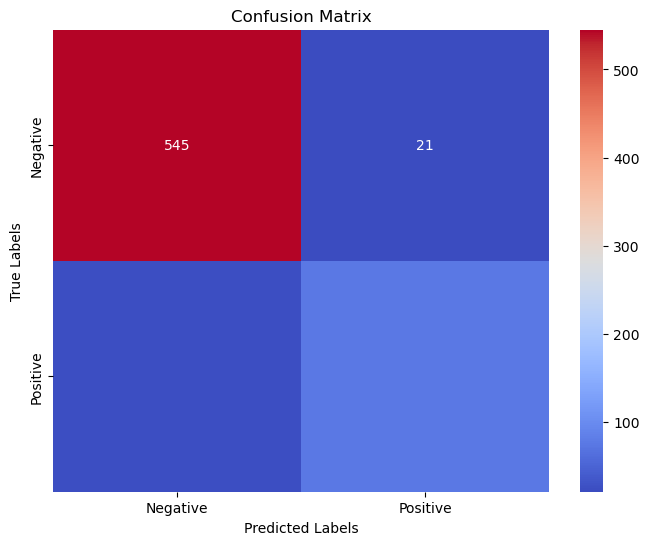


ROC-AUC Score: 0.9125


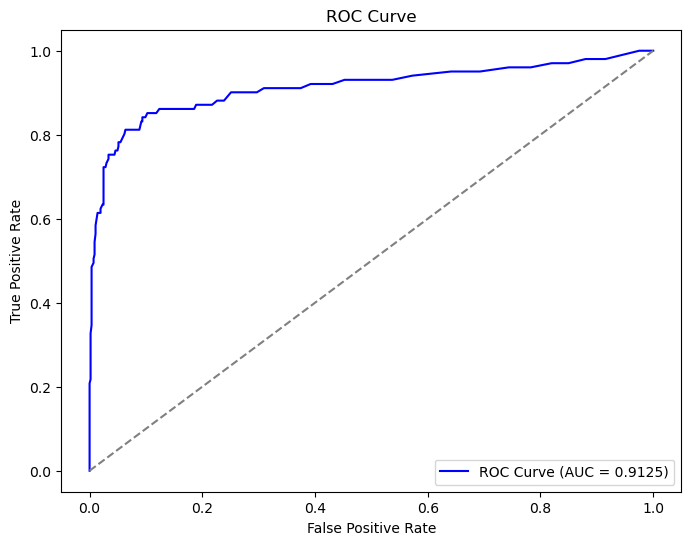

In [82]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest Classifier model on the resampled data
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions on the original test set
y_pred = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

#  Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Additional Evaluation Metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#  ROC-AUC Curve and Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Top 6 most important Features in Random Forest classifier Model

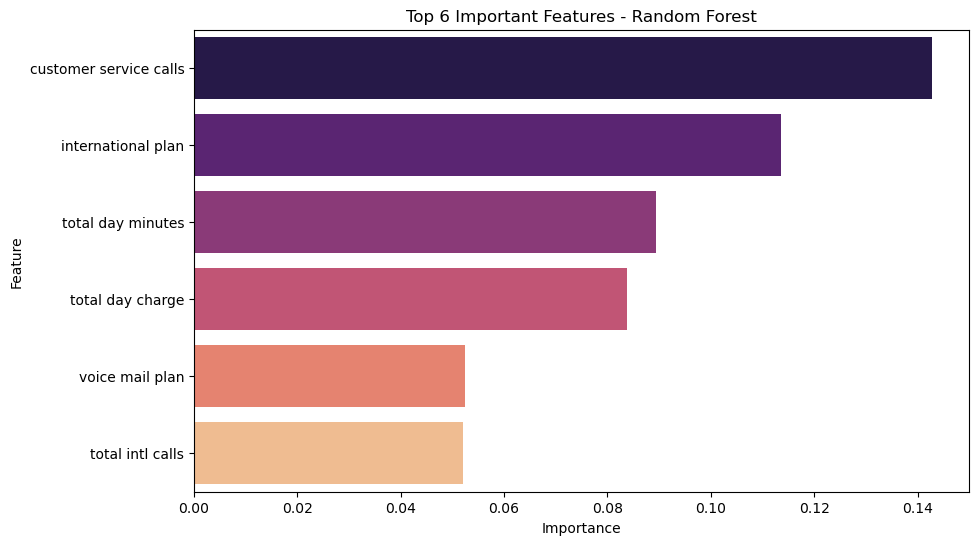

                   Feature  Importance
17  customer service calls    0.142814
2       international plan    0.113583
5        total day minutes    0.089423
7         total day charge    0.083843
3          voice mail plan    0.052403
15        total intl calls    0.051987


In [83]:
importances = rf_model.feature_importances_

#  Visualize Feature Importances
features = X.columns  # Get the feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 6 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(6), palette='magma')
plt.title('Top 6 Important Features - Random Forest')
plt.show()

# Optionally, print the sorted feature importances
print(importance_df.head(6))